# 第3部　Pythonによるデータ分析｜Pythonで学ぶ統計学入門

## 3章　matplotlib・seabornによるデータの可視化

### 実装：可視化のための準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd

# 表示桁数の指定
%precision 3

# グラフを描画するライブラリ
from matplotlib import pyplot as plt

# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

### 実装：pyplotによる折れ線グラフ

In [2]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

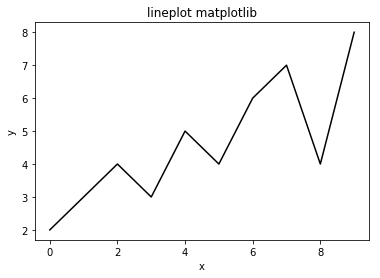

In [3]:
plt.plot(x, y, color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

### 実装：seaborn + pyplotによる折れ線グラフ

In [4]:
import seaborn as sns
sns.set()

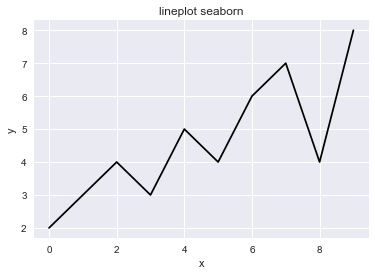

In [5]:
plt.plot(x, y, color = 'black')
plt.title("lineplot seaborn")
plt.xlabel("x")
plt.ylabel("y")

### 実装：seabornによるヒストグラム

In [6]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

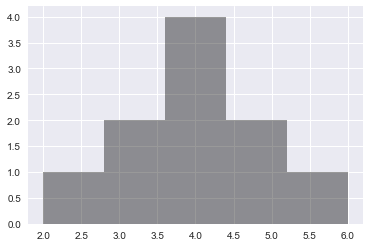

In [7]:
sns.distplot(fish_data, bins = 5, 
             color = 'black', kde = False)

### 実装：カーネル密度推定によるヒストグラム平滑化

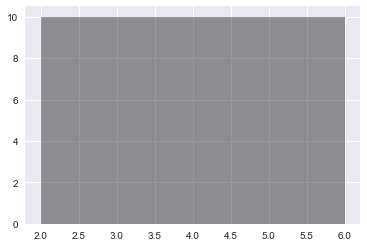

In [8]:
sns.distplot(fish_data, bins = 1, 
             color = 'black', kde = False)

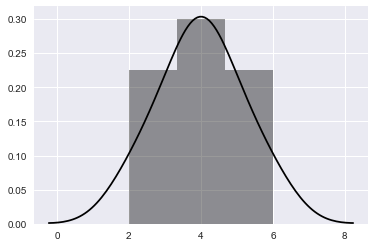

In [9]:
sns.distplot(fish_data, color = 'black')

### 実装：2変量データに対するヒストグラム

In [10]:
fish_multi = pd.read_csv("3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [11]:
print(fish_multi.groupby("species").describe())

        length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0


In [12]:
# データを魚の種類ごとに分ける
length_a = fish_multi.query('species == "A"')["length"]
length_b = fish_multi.query('species == "B"')["length"]

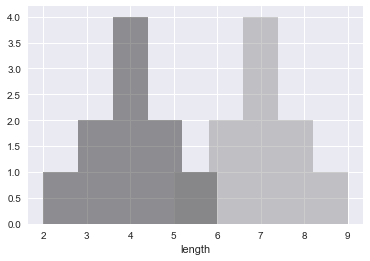

In [13]:
# ヒストグラムを2つ描く
sns.distplot(length_a, bins = 5, 
             color = 'black', kde = False)
sns.distplot(length_b, bins = 5, 
             color = 'gray', kde = False)

### 実装：箱髭図

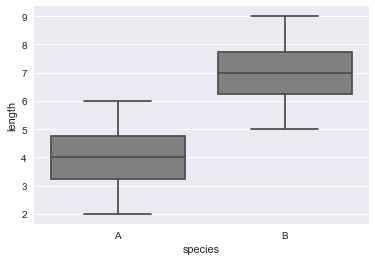

In [14]:
# 箱髭図
sns.boxplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')

In [15]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

### 実装：バイオリンプロット

In [16]:
sns.violinplot(x = "species", y  = "length", 
               data = fish_multi, color = 'gray')

### 実装：棒グラフ

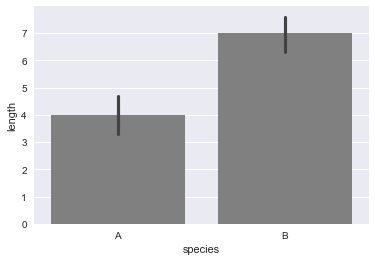

In [17]:
sns.barplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')

### 実装：散布図

In [18]:
cov_data = pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


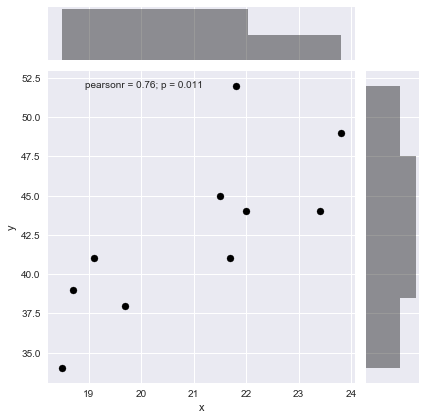

In [19]:
sns.jointplot(x = "x", y = "y", 
              data = cov_data, color = 'black')

### 実装：ペア・プロット

In [20]:
# seaborn組み込みのアヤメのデータを取得
iris = sns.load_dataset("iris")
iris.head(n = 3)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

In [21]:
# アヤメの種類別・特徴別の平均値
iris.groupby("species").mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

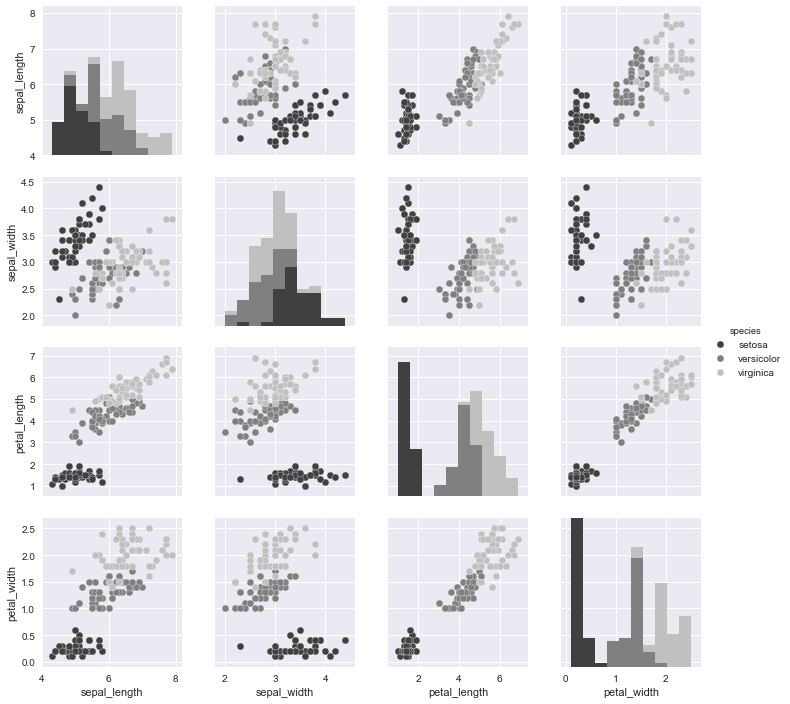

In [22]:
# ペアプロット
sns.pairplot(iris, hue="species", palette='gray')